<a href="https://colab.research.google.com/github/danielturg/Road2_AI_Course_Scripts/blob/main/HW7_Road2_AI_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

displaying an image from drive. ignore

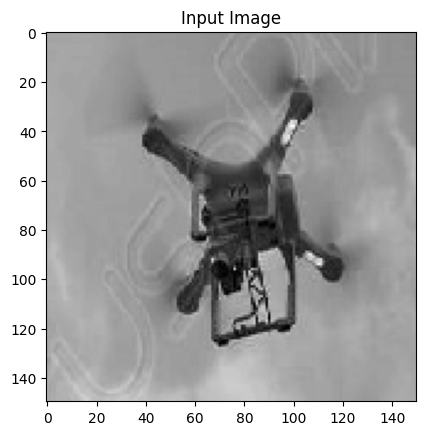

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to the image you want to predict
path_to_image = "/content/drive/MyDrive/AI_Course/flying-drone-sky-1790695.jpg"

# Load and preprocess the image
img = load_img(path_to_image, color_mode='grayscale', target_size=(150,150))

# Convert the image to a numpy array
img_array = img_to_array(img)

# Display the image
plt.imshow(img_array[:, :, 0], cmap='gray')  # Assuming the image is grayscale
plt.title('Input Image')
plt.show()


generating "No Detection" images

In [ ]:
import os
import cv2
import numpy as np

def generate_fake_labels(image_shape):
    # Generate random bounding box values
    x_center = np.random.uniform(0.2, 0.8)
    y_center = np.random.uniform(0.2, 0.8)
    width = np.random.uniform(0.2, 0.4)
    height = np.random.uniform(0.2, 0.4)

    # Compute bounding box coordinates
    xmin = int(max(0, (x_center - 0.5 * width) * image_shape[1]))
    ymin = int(max(0, (y_center - 0.5 * height) * image_shape[0]))
    xmax = int(min(image_shape[1], (x_center + 0.5 * width) * image_shape[1]))
    ymax = int(min(image_shape[0], (y_center + 0.5 * height) * image_shape[0]))

    return xmin, ymin, xmax, ymax

def crop_resize_no_detection(input_folder, output_folder):
    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of image files in the input folder
    image_files = [file for file in os.listdir(input_folder) if file.endswith(".jpg")]

    # Process each image file
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Generate fake label values
        xmin, ymin, xmax, ymax = generate_fake_labels(image.shape)

        # Crop and resize the image
        cropped_image = image[ymin:ymax, xmin:xmax]
        resized_image = cv2.resize(cropped_image, (150,150))

        # Convert the image to grayscale

        # Save the processed image with "_fake" suffix
        output_image_path = os.path.join(output_folder, image_file.replace('.jpg', '_no_detection.jpg'))
        cv2.imwrite(output_image_path, resized_image)


# Example usage
input_folder = "/content/drive/MyDrive/AI_Course/drone_data"
output_folder = "/content/drive/MyDrive/AI_Course/No_Detection_Processed"
crop_resize_no_detection(input_folder, output_folder)

print("No Detection image processing completed.")


No Detection image processing completed.


processing the Drone images

In [ ]:
import os
import cv2
from tqdm import tqdm  # Import tqdm for the progress bar

def crop_resize(input_folder, output_folder):
    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of image files in the input folder
    image_files = [file for file in os.listdir(input_folder) if file.endswith(".jpg")]

   # Create a tqdm progress bar
    progress_bar = tqdm(total=len(image_files), desc="Processing Images", position=0, leave=True)

    # Process each image file
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Load the label
        label_path = os.path.join(input_folder, image_file.replace('.jpg', '.txt'))
        label_values = open(label_path).readline().split()

        # Extract bounding box values from the label
        contains_drone = int(label_values[0])
        x_center, y_center, width, height = map(float, label_values[1:])

        # Compute bounding box coordinates
        xmin = int(max(0, (x_center - 0.5 * width) * image.shape[1]))
        ymin = int(max(0, (y_center - 0.5 * height) * image.shape[0]))
        xmax = int(min(image.shape[1], (x_center + 0.5 * width) * image.shape[1]))
        ymax = int(min(image.shape[0], (y_center + 0.5 * height) * image.shape[0]))

        # Crop and resize the image
        cropped_image = image[ymin:ymax, xmin:xmax]
        resized_image = cv2.resize(cropped_image, (150,150))

        # Save the processed image
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, resized_image)
        # Update the progress bar
        progress_bar.update(1)
    # Close the progress bar
    progress_bar.close()

# Example usage
input_folder = "/content/drive/MyDrive/AI_Course/drone_data"
output_folder = "/content/drive/MyDrive/AI_Course/Drone_Processed"
crop_resize(input_folder, output_folder)

print("Image processing completed.")



Processing Images: 100%|██████████| 4070/4070 [01:58<00:00, 34.30it/s]

Image processing completed.


processing the Bird images

In [1]:
import os
import cv2
from tqdm import tqdm  # Import tqdm for the progress bar

def crop_resize(input_folder, output_folder):
    # Create the output folder
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of image files in the input folder
    image_files = [file for file in os.listdir(input_folder) if file.endswith(".jpg")]

   # Create a tqdm progress bar
    progress_bar = tqdm(total=len(image_files), desc="Processing Images", position=0, leave=True)

    # Process each image file
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Load the label
        label_path = os.path.join(input_folder, image_file.replace('.jpg', '.txt'))
        label_values = open(label_path).readline().split()

        # Extract bounding box values from the label
        contains_drone = int(label_values[0])
        x_center, y_center, width, height = map(float, label_values[1:])

        # Compute bounding box coordinates
        xmin = int(max(0, (x_center - 0.5 * width) * image.shape[1]))
        ymin = int(max(0, (y_center - 0.5 * height) * image.shape[0]))
        xmax = int(min(image.shape[1], (x_center + 0.5 * width) * image.shape[1]))
        ymax = int(min(image.shape[0], (y_center + 0.5 * height) * image.shape[0]))

        # Crop and resize the image
        cropped_image = image[ymin:ymax, xmin:xmax]
        resized_image = cv2.resize(cropped_image, (150,150))

        # Save the processed image
        output_image_path = os.path.join(output_folder, image_file)
        cv2.imwrite(output_image_path, resized_image)
        # Update the progress bar
        progress_bar.update(1)
    # Close the progress bar
    progress_bar.close()
# Example usage
input_folder = "/content/drive/MyDrive/AI_Course/bird_data"
output_folder = "/content/drive/MyDrive/AI_Course/Bird_Processed"
crop_resize(input_folder, output_folder)

print("Image processing completed.")

Processing Images: 100%|██████████| 3801/3801 [12:26<00:00,  5.09it/s]

Image processing completed.


images are now 150 by 150. creating a dataset with augmented images:

In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import cv2

def preprocess_images(input_folder, output_folder, category):
    # Create output folder
    output_category_folder = os.path.join(output_folder, category)
    os.makedirs(output_category_folder, exist_ok=True)

    # Initialize ImageDataGenerator with augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        brightness_range=[0.5, 1.5]
    )

    # Get a list of image files in the input folder
    image_files = [file for file in os.listdir(input_folder) if file.endswith(".jpg")]

    # Create a tqdm progress bar
    progress_bar = tqdm(total=len(image_files), desc=f"Processing {category} Images", position=0, leave=True)

    # Process each image file
    for image_file in image_files:
        # Load the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        # Reshape the image to meet the input requirements of ImageDataGenerator
        image = image.reshape((1,) + image.shape)

        # Generate augmented images
        for batch in datagen.flow(image, batch_size=1, save_to_dir=output_category_folder, save_prefix=image_file.split('.')[0], save_format='jpg'):
            break  # Stop after generating one augmented image

        # Update the progress bar
        progress_bar.update(1)

    # Close the progress bar
    progress_bar.close()

# Input and output folders
input_folders = [
    "/content/drive/MyDrive/AI_Course/Drone_Processed",
    "/content/drive/MyDrive/AI_Course/Bird_Processed",
    "/content/drive/MyDrive/AI_Course/No_Detection_Processed"
]
output_folder = "/content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None"

# Categories
categories = ["Drone", "Bird", "No Detection"]

# Process each category
for input_folder, category in zip(input_folders, categories):
    preprocess_images(input_folder, output_folder, category)

print("Image preprocessing and augmentation completed.")


Processing No Detection Images: 100%|██████████| 4070/4070 [02:21<00:00, 28.72it/s]

Image preprocessing and augmentation completed.


show aspects of the set

Number of images in /content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/Drone: 4070


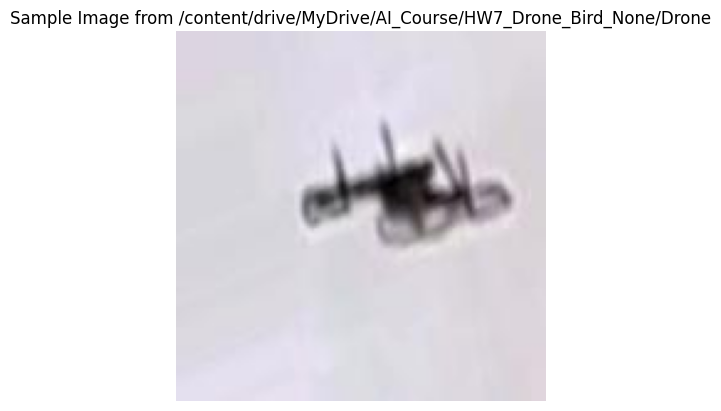

Number of images in /content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/Bird: 3801


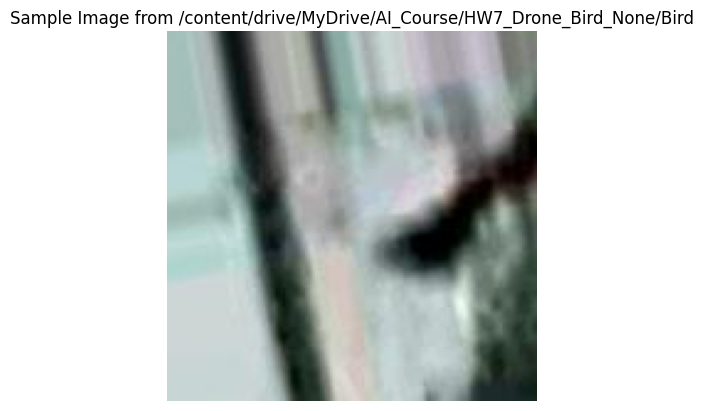

Number of images in /content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/No Detection: 4070


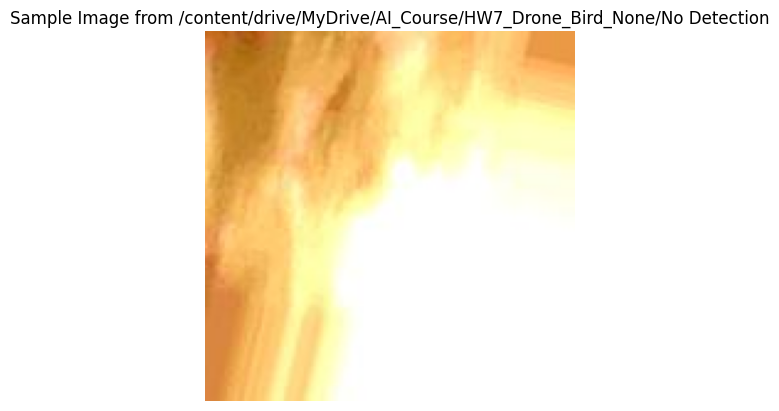

In [3]:
import os
import cv2
from matplotlib import pyplot as plt

def count_and_display_images(folder):
    # Get a list of image files in the folder
    image_files = [file for file in os.listdir(folder) if file.endswith(".jpg")]

    # Print the number of images in the folder
    print(f"Number of images in {folder}: {len(image_files)}")

    # Display one image from the folder
    if len(image_files) > 0:
        # Load and display the first image
        sample_image_path = os.path.join(folder, image_files[0])
        sample_image = cv2.imread(sample_image_path)

        # Convert from BGR to RGB (OpenCV loads images in BGR)
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

        plt.imshow(sample_image)
        plt.title(f"Sample Image from {folder}")
        plt.axis('off')
        plt.show()

# Folders to inspect
folders_to_inspect = [
    "/content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/Drone",
    "/content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/Bird",
    "/content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None/No Detection"
]

# Count and display images for each folder
for folder in folders_to_inspect:
    count_and_display_images(folder)


building and training the model

Epoch 1/20
299/299 [==============================] - 71s 195ms/step - loss: 3.8254 - accuracy: 0.7403 - val_loss: 0.4789 - val_accuracy: 0.8133
Epoch 2/20
299/299 [==============================] - 56s 187ms/step - loss: 0.5732 - accuracy: 0.8012 - val_loss: 0.5036 - val_accuracy: 0.8079
Epoch 3/20
299/299 [==============================] - 57s 190ms/step - loss: 0.3870 - accuracy: 0.8642 - val_loss: 0.2484 - val_accuracy: 0.9318
Epoch 4/20
299/299 [==============================] - 57s 192ms/step - loss: 0.3630 - accuracy: 0.8764 - val_loss: 0.2764 - val_accuracy: 0.9138
Epoch 5/20
299/299 [==============================] - 56s 187ms/step - loss: 0.2784 - accuracy: 0.9022 - val_loss: 0.2175 - val_accuracy: 0.9255
Epoch 6/20
299/299 [==============================] - 55s 183ms/step - loss: 0.2614 - accuracy: 0.9126 - val_loss: 0.1641 - val_accuracy: 0.9460
Epoch 7/20
299/299 [==============================] - 58s 192ms/step - loss: 0.2431 - accuracy: 0.9184 - val_loss: 0.1784 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1s 10ms/step - loss: 0.3049 - accuracy: 0.9318
Test Accuracy: 0.9317706227302551


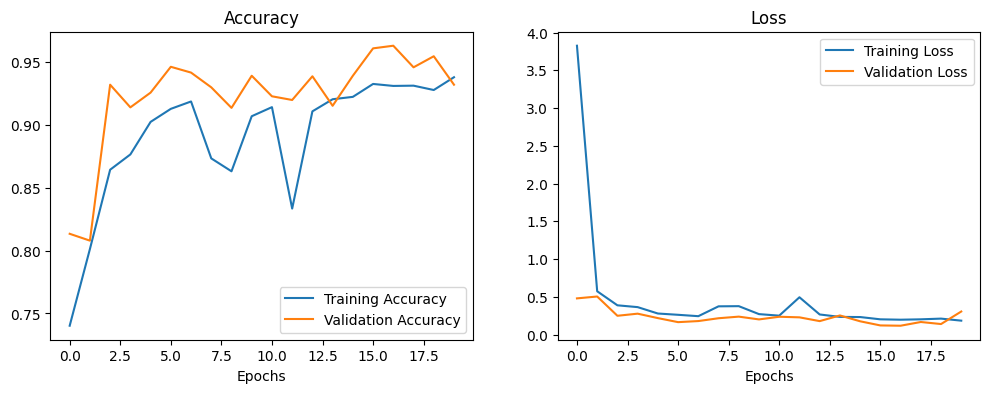

75/75 [==============================] - 1s 8ms/step
Confusion Matrix:
[[808   8   6]
 [ 31 633 101]
 [ 14   3 785]]
Classification Report:
              precision    recall  f1-score   support

       Drone       0.95      0.98      0.96       822
        Bird       0.98      0.83      0.90       765
No Detection       0.88      0.98      0.93       802

    accuracy                           0.93      2389
   macro avg       0.94      0.93      0.93      2389
weighted avg       0.94      0.93      0.93      2389



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


# Define path to the dataset
dataset_path = '/content/drive/MyDrive/AI_Course/HW7_Drone_Bird_None'

# Function to load and preprocess the dataset
def load_dataset(dataset_path):
    classes = ['Drone', 'Bird', 'No Detection']
    data = []
    labels = []

    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size as needed
            img_array = image.img_to_array(img)
            data.append(img_array)
            labels.append(i)

    data = np.array(data)
    labels = to_categorical(labels, num_classes=len(classes))

    return data, labels

# Load and preprocess the dataset
data, labels = load_dataset(dataset_path)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Augment the training data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model with augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

# Save the trained model
model.save('/content/drive/MyDrive/AI_Course/HW7_trained_model.h5')

del data, labels, X_train, y_train  # Delete large variables

# Continue with evaluation

# Save the trained model
model.save('/content/drive/MyDrive/AI_Course/HW7_trained_model.h5')

# Evaluate the model on the test set in batches
batch_size = 32  # Choose an appropriate batch size
steps = int(np.ceil(len(X_test) / batch_size))
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size, steps=steps)
print(f"Test Accuracy: {test_acc}")


# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.show()

# Create a confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Drone', 'Bird', 'No Detection']))


load model if disconnected

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/AI_Course/HW7_trained_model.h5')  # Replace with your actual model path


predict from url

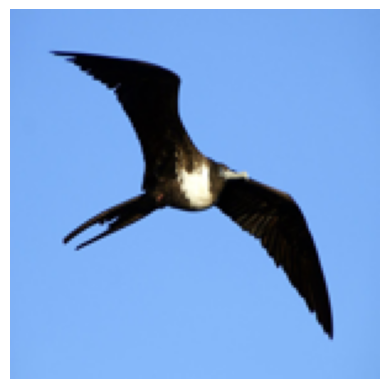

1/1 [==============================] - 0s 17ms/step
Predicted Class: Bird
Predicted Probabilities:
Drone: 0.006182645%
Bird: 99.993813038%
No Detection: 0.000000022%


In [23]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming the model is already loaded in a separate cell
# Load the trained model (if not already loaded)
# model = load_model('/content/drive/MyDrive/AI_Course/HW7_trained_model.h5')  # Replace with your actual model path

# Function to preprocess an image from a URL
def preprocess_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((150, 150))  # Adjust size based on your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# URL of the image you want to predict
image_url = 'https://daily.jstor.org/wp-content/uploads/2016/07/frigate_bird_1050x700.jpg'  # Replace with the URL of your image

# Preprocess the image
input_img, input_image = preprocess_image_from_url(image_url)

# Display the image
plt.imshow(input_img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model.predict(input_image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Map predicted class index to class label
class_labels = ['Drone', 'Bird', 'No Detection']
predicted_label = class_labels[predicted_class]

# Display the prediction result with percentages
print(f"Predicted Class: {predicted_label}")
print("Predicted Probabilities:")
for i, prob in enumerate(predictions[0]):
    class_label = class_labels[i]
    prob_percentage = prob * 100
    print(f"{class_label}: {prob_percentage:.9f}%")
